## DATA ANALYSIS OF ENGINEERING COLLEGES IN INDIA

### **Question 1**
* **How many** engineering colleges are there in the dataset?
* Let’s **slice** the count of colleges by : 
    * Type of entrance exam
    * Ratings
    * Sector
* What **% of entrance exams** lead to at least **80%** of admissions in India?
* Do you encounter **missing values** in the data?
  * If yes, list down column wise missing values in percentage
  * For which columns % of missing values is **> 20%**?
    * How do you plan to **impute** the missing values?
    * Discuss the strategies you would use to do the above task

### **Question 2** 
* Let’s analyze the **distribution** of fees. 
  * How does the distribution look like?
  * What is the **type** of distribution?
* Now, try to analyze the distribution of reviews by college **ratings**
  * Do you think colleges which have **good ratings** have significantly **higher** fees than the others?
  * **Note :** Logic to classify colleges based on ratings : 
    * Consider colleges with **rating >= AAAA** as those with good ratings else decent
* Now, repeat the above activity by type of college (**Private** vs **Public/Govt**)
  * Do you think Private colleges have significantly higher fee than the others?

* **Important Note :** If you observe in couple of questions above, we are asking to establish whether the difference in fees between 2 categories is significantly higher or lower. What do you mean by significant here? How wide he difference is significant and not happening just by chance?
* **Hint :** Think Statistics!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('Engineering_colleges.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6976 entries, 0 to 6975
Data columns (total 10 columns):
Institute_Name    6976 non-null object
Location          6976 non-null object
Sector            6976 non-null object
Review_Count      6976 non-null int64
Fee               6976 non-null int64
Exam              2772 non-null object
Rating            6976 non-null object
Latitude          6976 non-null float64
Longitude         6976 non-null float64
State             6976 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 545.1+ KB


In [3]:
df.head()

,Institute_Name,Location,Sector,Review_Count,Fee,Exam,Rating,Latitude,Longitude,State
0,University of Petroleum and Energy Studies,Dehradun,Private,56,0,NaN,AAAA (Very Good),30.325565,78.043681,Uttarakhand
1,Manipal Institute of Technology,Manipal,Private,153,1540000,MET,AAAA (Very Good),13.351972,74.787031,Karnataka
2,SRM Institute of Science and Technology,Kattankulathur,Private,328,1000000,JEE Main,AAAA (Very Good),12.816150,80.036770,Tamil Nadu
3,Vellore Institute of Technology,Vellore,Private,350,780000,VITEEE,AAAA (Very Good),12.907175,79.130969,Tamil Nadu
4,Jain University,Ramanagara,Private,58,0,NaN,No Rating,12.725277,77.280480,Karnataka


In [4]:
df.shape

(6976, 10)

#### Dropping duplicates from the data set:

In [5]:
# Removing Alberta as it is not a state of India
df = df[df['State'] != 'Alberta']

In [6]:
df.drop_duplicates(subset=['Latitude', 'Longitude','Institute_Name'], keep='first' ,inplace = True)

#### Lets drop the columns which are not needed for the analysis:  Institute_Name, Location, Latitude, and Longitude

In [7]:
df = df[['State', 'Sector', 'Review_Count', 'Fee', 'Exam', 'Rating']]
df.reset_index(inplace = True)

**How many engineering colleges are there in the dataset?**

In [8]:
# Total number of engineering colleges in the data set
m = len(df)
print("Total number of engineering colleges in the data set are", m)

Total number of engineering colleges in the data set are 6949


**Types of entrance exam**

In [9]:
df_exam = df.Exam.value_counts().reset_index()
df_exam.columns=['Entrance_Exam', 'Total_colleges']
df_exam.head()

,Entrance_Exam,Total_colleges
0,JEE Main,1317
1,AP EAMCET,259
2,TS EAMCET,165
3,NATA,160
4,UPSEE,150


In [10]:
(df_exam['Total_colleges'][0]/df_exam['Total_colleges'].sum())*100

47.63110307414105

Here we can see that we have lot of missing data, we have values only for 2765 data. So we need to impute the missing 4184 data .

* **Types of ratings of the colleges**

In [11]:
df_rating = df.Rating.value_counts().reset_index()
df_rating.columns = ['Rating', 'Total_colleges']
df_rating

,Rating,Total_colleges
0,No Rating,6409
1,AAA+ (Good),217
2,AAA (Above Average),159
3,AAAA (Very Good),120
4,AAAA+ (Outstanding),38
5,AAAAA (Exceptional),6


Here also we see that we have no rating for 6409 data. So we need to impute these as well.

In [12]:
df[df['Fee'] ==0]['Fee'].count()

1473

Note: Fee data for 1473 colleges are missing, we should take care of these as well.

**Types of Sectors of the colleges**

In [13]:
# Sector wise division of the colleges:
sector_wise = pd.DataFrame(df.Sector.value_counts()).reset_index()
sector_wise.columns=['Sector', 'No. of colleges']
sector_wise

,Sector,No. of colleges
0,Private,5612
1,Public/Government,1332
2,No Sector,5


There are only around 1.3k government colleges compared to 5.6k Private colleges.

#### Encoding the Rating to ordinal values

In [14]:
# set(df.Rating)

In [15]:
Rating_dict = {'No Rating': 0, 'AAA (Above Average)': 1, 'AAA+ (Good)': 2, 'AAAA (Very Good)': 3, 'AAAA+ (Outstanding)': 4, 'AAAAA (Exceptional)': 5}
df['Rating_encode'] = df.Rating.map(Rating_dict)
df = df[['index', 'Sector', 'Review_Count','Fee', 'Exam', 'State', 'Rating_encode']]
df.head()

,index,Sector,Review_Count,Fee,Exam,State,Rating_encode
0,0,Private,56,0,NaN,Uttarakhand,3
1,1,Private,153,1540000,MET,Karnataka,3
2,2,Private,328,1000000,JEE Main,Tamil Nadu,3
3,3,Private,350,780000,VITEEE,Tamil Nadu,3
4,4,Private,58,0,NaN,Karnataka,0


### IMPUTING MISSING VALUES:

In [16]:
df['Sector'].value_counts()

Private              5612
Public/Government    1332
No Sector               5
Name: Sector, dtype: int64

In [17]:
# Diving the dataset to Public and Private sectors
df_Private = df[(df['Sector'] == "Private")]
df_Private = df_Private.values
df_Public = df[(df['Sector'] == "Public/Government")]
df_Public = df_Public.values

In [18]:
# Resaping columns with missing values in order to apply the imputation:
df_r = df_Private[:, 6].reshape(5612, 1)
df_f = df_Private[:, 3].reshape(5612, 1)
df_r1 = df_Public[:, 6].reshape(1332, 1)
df_f1 = df_Public[:, 3].reshape(1332, 1)

In [19]:
# Imputing missing values of Private Sector colleges. Column Fees using mean and Rating using median.
imputer = SimpleImputer(missing_values = 0, strategy = 'median')
imputer.fit(df_r)
df_r = imputer.transform(df_r)
imputer = SimpleImputer(missing_values = 0, strategy = 'mean')
imputer.fit(df_f)
df_f = imputer.transform(df_f)

In [20]:
# Imputing missing values of Public/Government Sector colleges. Column Fees using mean and Rating using median.
imputer = SimpleImputer(missing_values = 0, strategy = 'median')
imputer.fit(df_r1)
df_r1 = imputer.transform(df_r1)
imputer  = SimpleImputer(missing_values = 0, strategy = 'mean')
imputer.fit(df_f1)
df_f1 = imputer.transform(df_f1)

In [21]:
# Reshaping back to original shape:
df_r = df_r.reshape(5612,)
df_f = df_f.reshape(5612,)
df_r1 = df_r1.reshape(1332,)
df_f1 = df_f1.reshape(1332,)

In [22]:
#Replacing original column with imputed columns
df_Private[: , 3] = df_f
df_Private[: , 6] = df_r
df_Public[:, 3] = df_f1
df_Public[:, 6] = df_r1

In [100]:
df_Private = pd.DataFrame(df_Private)
df_Public = pd.DataFrame(df_Public)

In [101]:
#Joining the imputed data
df = df_Public.append(df_Private)
df = df[[1, 2, 3, 4, 5, 6]]
df.columns = ['Sector', 'Reviews_count', 'Fees', 'Exam', 'State', 'Rating']
df.shape

(6944, 6)

In [102]:
df.reset_index(inplace = True)

### VISUALIZING THE DATASET :

### Univariate Visualization:

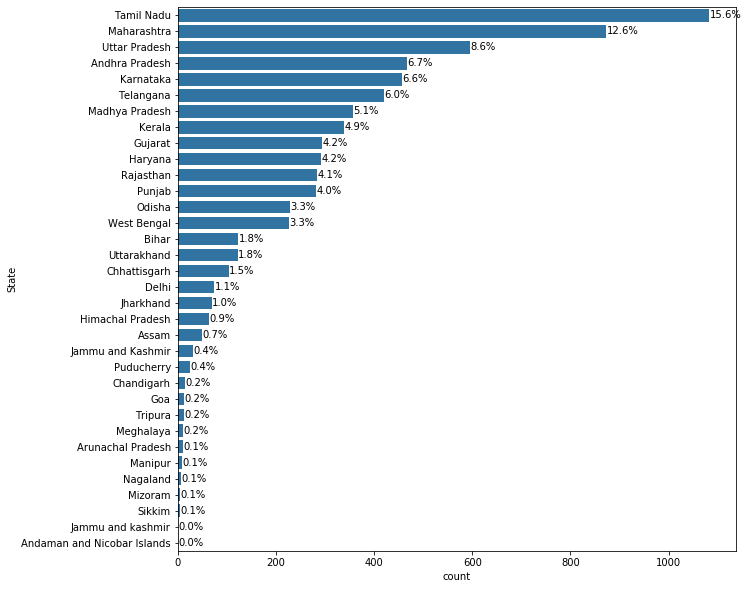

In [26]:
order = df['State'].value_counts().index
val = df['State'].value_counts().values
color = sns.color_palette()[0]
plt.figure(figsize = (10, 10));
sns.countplot(data = df, y = 'State', order = order, color = color);
value_df = df['State'].value_counts()
tot = df['State'].value_counts().sum()
for i in range(value_df.shape[0]):
    count = value_df[i]
    pct = '{:0.1f}%'.format(100*count/tot)
    plt.text(count+1, i, pct, va = 'center');

#### Distribution of Fees:

In [83]:
#REmoving few outliers from dataset:
df = df[df['Fees'] != df['Fees'].max()]

In [103]:
df['Fees'].max()

4840000.0

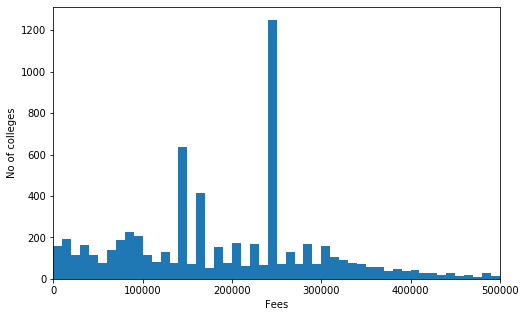

In [97]:
plt.figure(figsize = (8, 5))
bin_edges = np.arange(0, df['Fees'].max()+5, 10000)
plt.hist(x = 'Fees', data = df, bins = bin_edges)
plt.xlim(0,500000)
plt.ylabel('No of colleges')
plt.xlabel('Fees');

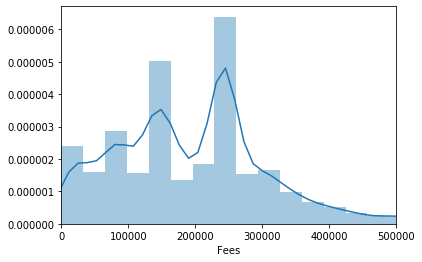

In [93]:
sns.distplot(df['Fees'])
plt.xlim(0,500000);

In [110]:
print(df['Fees'].mean())
np.log10(df['Fees'].astype(int).describe())

222815.17877498697


count    3.841610
mean     5.347945
std      5.296425
min      2.255273
25%      5.064458
50%      5.302764
75%      5.414973
max      6.684845
Name: Fees, dtype: float64

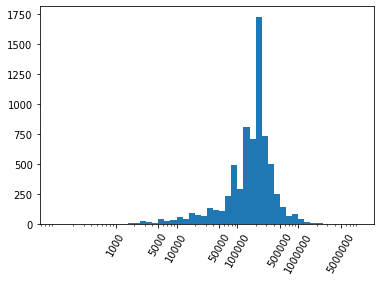

In [116]:
bin_edges = 10 ** np.arange(2, 7+0.1, 0.1)
ticks = [1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(x = 'Fees', data = df, bins = bin_edges)
plt.xscale('log')
plt.xticks(ticks, labels, rotation = 60);

It is a right skewed distribution, bimodal and having a mean of 221113.05

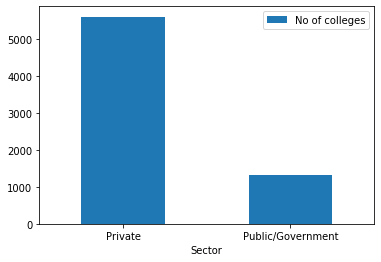

In [30]:
df_fee1 = df[df['Fees'] != 0]['Sector'].value_counts().reset_index()
df_fee1.columns = ['Sector', 'No of colleges']
df_fee1
ax = df_fee1.plot.bar(x='Sector', y='No of colleges', rot=0)

In [31]:
df_1 = df[['index', 'State', 'Sector']].groupby(['State', 'Sector']).count().reset_index().sort_values('index', ascending=False)

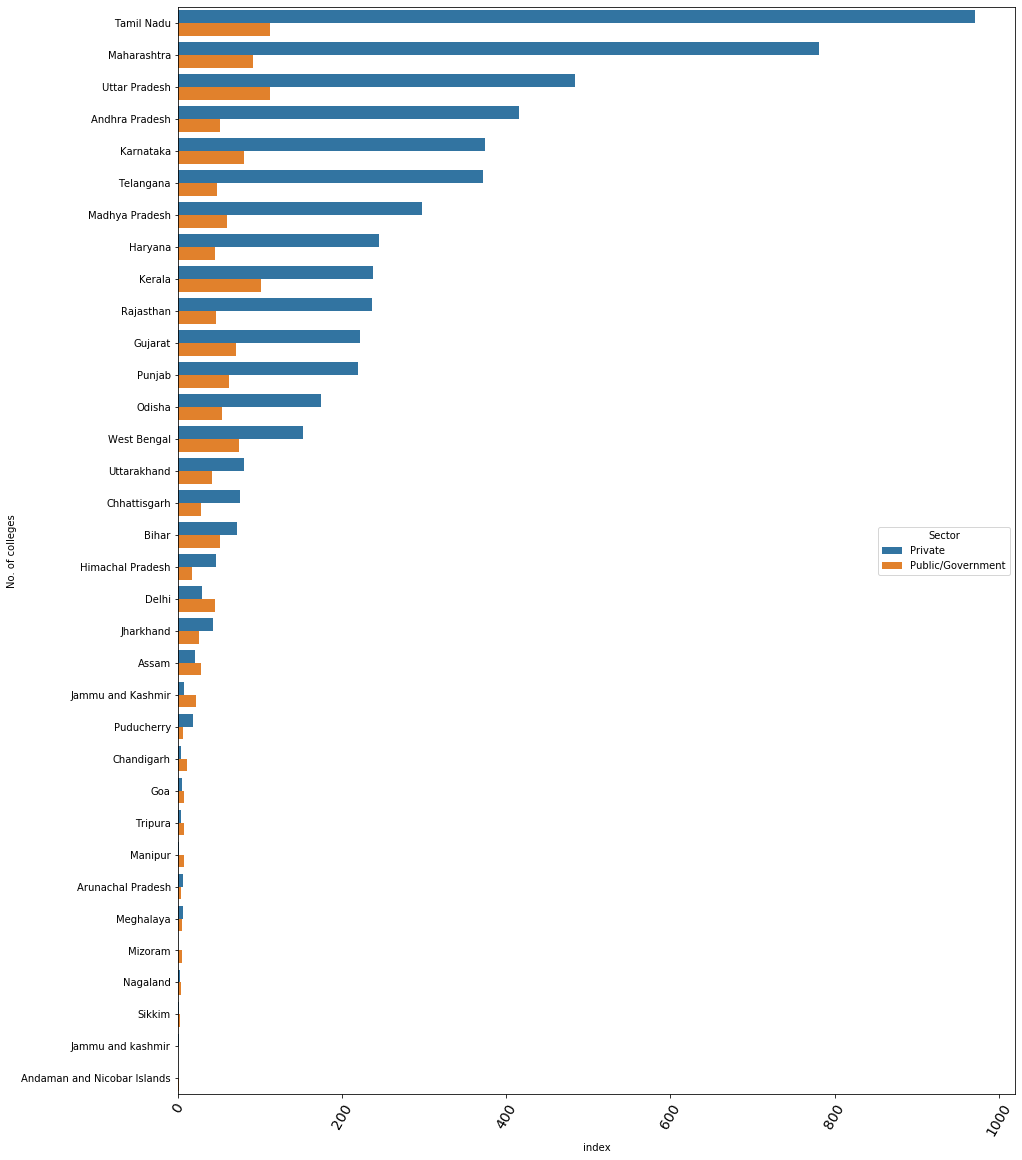

In [32]:
plt.figure(figsize=(15, 20))
sns.barplot(y="State", hue="Sector", x="index", data=df_1)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=10)
# plt.rcParams.update({'font.size': 22})
plt.rcParams["font.size"] = "10"
plt.ylabel('No. of colleges')
value_df = df_1['index'].value_counts().index.sort_values(ascending=False)
tot = df['State'].value_counts().sum()

#### Plotting Fee and Reviews_count and sector of the college:

In [134]:
df['Fees'] = df['Fees'].astype(int)

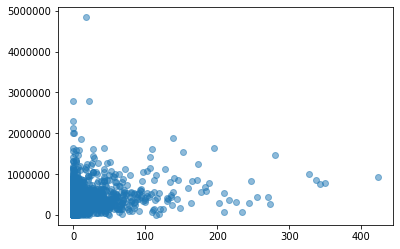

In [139]:
plt.scatter(data = df, x = 'Reviews_count', y = 'Fees', alpha = 0.5);

#### Plotting Fee and Rating of the college:

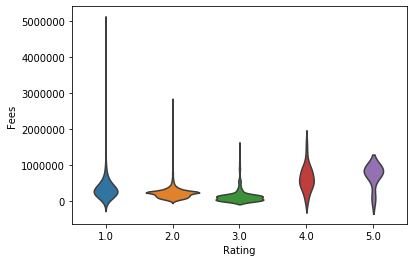

In [143]:
sns.violinplot(data = df, x = 'Rating', y = 'Fees', inner = None);

There does seem to be positive corelation between Fee and Rating, colleges with Ratings 4 and 5 have higher fees compared to other ratings. There seem to be few outliers in colleges with rating 1 and 2. 

#### Plotting Fee and Sector of college

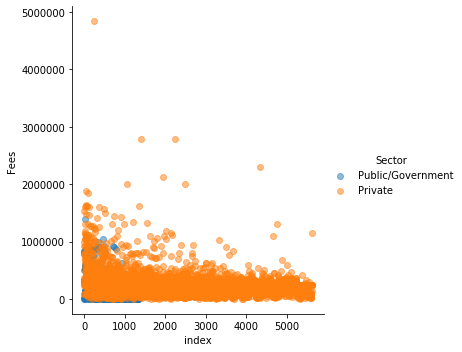

In [148]:
g = sns.FacetGrid(data = df, hue = 'Sector', height = 5)
g.map(plt.scatter, 'index', 'Fees', alpha = 0.5)
g.add_legend();

Private Colleges have a very varied fees from low to higher fees and there are lot of outliers, where as the government colleges have uniform pattern. 